In [ ]:
!pip install keras


In [1]:
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
model=Sequential()

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
%matplotlib inline

# Load the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv", sep=";")
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
#seprate features and target 
data = df.values
data=df.drop(['STUDENT ID'], axis =1)
X = data.drop(['GRADE'], axis=1)

Y = data['GRADE']


In [4]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [5]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder() 
y_train= label.fit_transform(y_train) 
y_test= label.fit_transform(y_test) 
print(y_test)

[4 3 3 3 5 1 5 1 3 1 6 2 2 3 2 1 2 1 7 1 1 0 6 7 2 2 7 3 2 7 1 1 1 0 4 2 1
 1 5 4 3 1 7 2]


In [6]:
from keras.utils import np_utils


In [7]:
# Encoding training dataset
encoding_train_y = np_utils.to_categorical(y_train)
print(encoding_train_y)
# Encoding testing dataset
encoding_test_y = np_utils.to_categorical(y_test)
print(encoding_test_y)

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 

In [23]:
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf
#from keras.optimizers import Adam

# Creating a model
model = Sequential()
model.add(Dense(22, input_dim=31, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compiling model
from keras import backend as K
optimizer = tf.keras.optimizers.Adam(0.01)
optimizer.learning_rate.assign(0.01)
print(optimizer.learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [9]:
# Training a model
model.fit(X_train, encoding_train_y, epochs=50, batch_size=2)

Epoch 1/50
51/51 [==============================] - 1s 2ms/step - loss: 2.0749 - accuracy: 0.1980
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 2.0517 - accuracy: 0.1386
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 2.0094 - accuracy: 0.2673
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 2.0188 - accuracy: 0.2376
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 2.0158 - accuracy: 0.2277
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 2.0079 - accuracy: 0.2475
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 2.0108 - accuracy: 0.2277
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 1.9322 - accuracy: 0.2475
Epoch 9/50
51/51 [==============================] - 0s 2ms/step - loss: 1.9704 - accuracy: 0.2772
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 1.9256 - accuracy: 0.2376
Epoch 11/50
51/51 [

In [24]:
# Evaluate the model
scores = model.evaluate(X_test, encoding_test_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 4ms/step - loss: 1.9309 - accuracy: 0.2500

Accuracy: 25.00%


In [25]:

# Fit the network
#
history = model.fit(X_train, encoding_train_y,
                    validation_data=(X_test, encoding_test_y),
                    epochs=20,
                    batch_size=20)


Epoch 1/20
6/6 [==============================] - 1s 22ms/step - loss: 2.0750 - accuracy: 0.1782 - val_loss: 2.0454 - val_accuracy: 0.1591
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 2.0348 - accuracy: 0.1881 - val_loss: 1.9153 - val_accuracy: 0.2955
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 2.0011 - accuracy: 0.2178 - val_loss: 1.9138 - val_accuracy: 0.2955
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 1.9692 - accuracy: 0.2178 - val_loss: 1.9085 - val_accuracy: 0.2955
Epoch 5/20
6/6 [==============================] - 0s 14ms/step - loss: 1.9408 - accuracy: 0.2178 - val_loss: 1.9056 - val_accuracy: 0.2955
Epoch 6/20
6/6 [==============================] - 0s 10ms/step - loss: 1.9381 - accuracy: 0.2178 - val_loss: 1.9167 - val_accuracy: 0.2955
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 1.9553 - accuracy: 0.2178 - val_loss: 1.8843 - val_accuracy: 0.2955
Epoch 8/20
6/6 [============

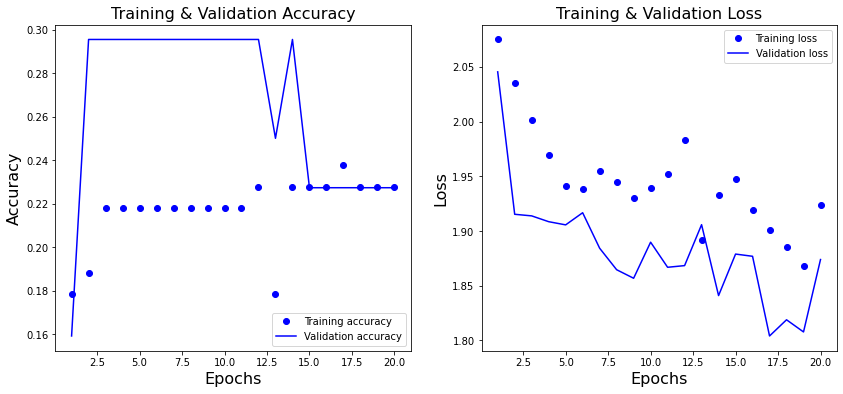

In [26]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()